In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [20]:
def apply_pca(X, n_components=2):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    explained_variance_df = pd.DataFrame({
        'Principal Component': [f'PC{i+1}' for i in range(n_components)],
        'Explained Variance Ratio': pca.explained_variance_ratio_.round(4)
    })
    return X_pca, explained_variance_df

In [21]:
dataset1 = pd.read_csv("CKD.csv",index_col=None)

In [22]:
df2 = dataset1

In [23]:
df2 = pd.get_dummies(df2,drop_first=True)

In [24]:
def plot_pca_2d(X_pca, y):
    pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    pca_df['classification_yes'] = y.values

    plt.figure(figsize=(8,6))
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='classification_yes', palette='Set1', s=60)
    plt.title('PCA of CKD Dataset (2 Components)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.legend(title='Class')
    plt.tight_layout()
    plt.show()

In [25]:
def run_pca_classification(X, y, n_components=2,show_plot=True):
    

    X_pca, explained_variance_df = apply_pca(X, n_components=n_components)
    #pca_values = X_pca.explained_variance_ratio_.round(4)
    accuracy_df = evaluate_classifiers(X_pca, y)
    if show_plot:
        plot_pca_2d(X_pca, y)
    return explained_variance_df, accuracy_df

In [26]:
def evaluate_classifiers(X, y):
    classifiers = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'SVM Linear': SVC(kernel='linear'),
        'SVM RBF': SVC(kernel='rbf'),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    accuracy_results = []
    for name, model in classifiers.items():
        model.fit(X_train, y_train)
        accuracy = accuracy_score(y_test, model.predict(X_test))
        accuracy_results.append({'Classifier': name, 'Accuracy': accuracy})

    accuracy_df = pd.DataFrame(accuracy_results)
    return accuracy_df

In [27]:

X = df2.drop('classification_yes',1)
y = df2['classification_yes']


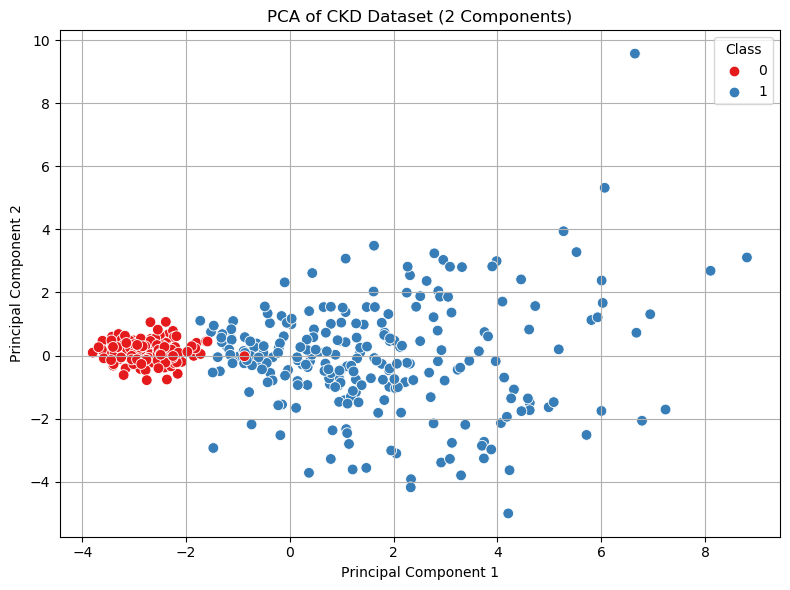

Explained Variance by PCA:
  Principal Component  Explained Variance Ratio
0                 PC1                    0.2614
1                 PC2                    0.0706

Classifier Accuracy on PCA Data:
            Classifier  Accuracy
0  Logistic Regression    0.9750
1           SVM Linear    0.9625
2              SVM RBF    0.9875
3        Decision Tree    0.9750
4        Random Forest    0.9750


In [28]:
# X = feature matrix, y = labels
explained_df, accuracy_df = run_pca_classification(X, y, n_components=2)

print("Explained Variance by PCA:")
print(explained_df)

print("\nClassifier Accuracy on PCA Data:")
print(accuracy_df)